In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!apt update
!apt install software-properties-common
!add-apt-repository -y ppa:alex-p/tesseract-ocr
!apt install tesseract-ocr
!pip install pytesseract

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,332 kB]
Hit:13 https://developer.download.nvidia.com

In [7]:
!sudo apt-get install tesseract-ocr-rus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,273 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic/main amd64 tesseract-ocr-rus all 1:4.0.0+git39-6572757-1ppa1~bionic1 [1,273 kB]
Fetched 1,273 kB in 1s (1,697 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a contro

In [65]:
!ls /content/Test/test

In [66]:
!rm *.jpg

In [67]:
%cd Test
!7z e /content/drive/MyDrive/Датасет/Test.zip

/content/Test

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Датасет/                                                1 file, 1473593977 bytes (1406 MiB)

Extracting archive: /content/drive/MyDrive/Датасет/Test.zip
 33% 4096 Open              --
Path = /content/drive/MyDrive/Датасет/Test.zip
Type = zip
Physical Size = 1473593977

  0%    
Enter password (will not be echoed):
  0% 1 - __MACOSX/._Test                          0% 164          0% 317 - __MACOSX/Test/test/._01671.jpg                                         

In [75]:
!ls Test/*.csv

Test/test.csv


In [77]:
!mkdir Test/images

In [78]:
!mv Test/*.jpg Test/images

In [79]:
!ls Test/

images	__MACOSX  test	Test  test.csv


In [1]:
from PIL import Image
import pytesseract

In [12]:
import cv2
import matplotlib.pyplot as plt

In [166]:
num = "01960"

In [167]:
img = Image.open(f"/content/Test/test/{num}.jpg")
img.load()
text = pytesseract.image_to_string(img, lang="rus")  #Specify language to look after!
print(text)

Неоновые
вывески

 



In [168]:
text

'Неоновые\nвывески\n\n \n\x0c'

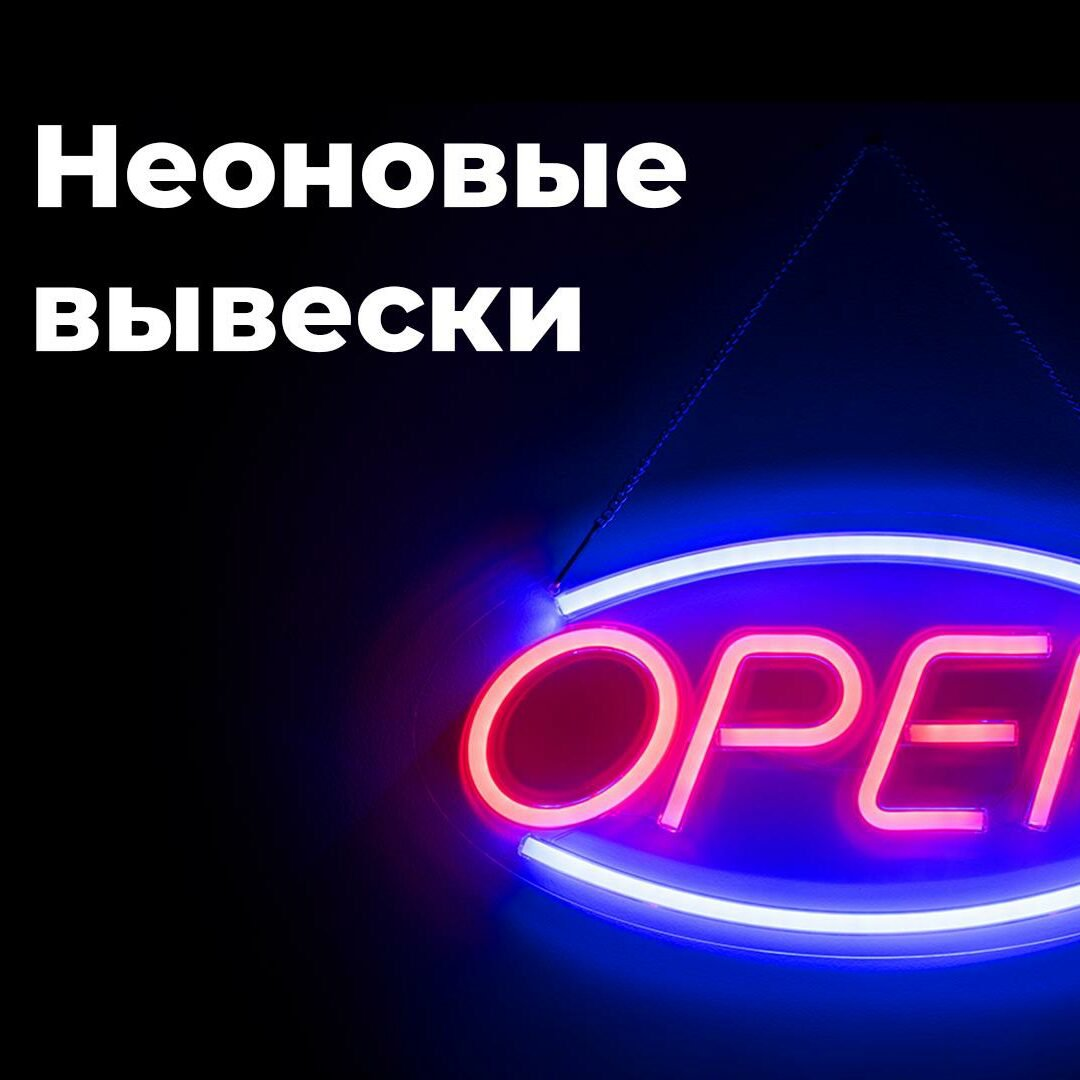

In [169]:
img

In [138]:
num = 0

In [139]:
Image.open(f"/content/Test/test/{num}.jpg")

FileNotFoundError: ignored

In [177]:
def make_annotations(img_path, coords_list):
    if "label" in coords_list[0][0]:
        return

    coords_list = coords_list[0]
    img_path = f"/content/Test/{img_path}"

    try:
        # img = cv2.imread(img_path)
        img = Image.open(img_path)
        img.load()
    
    except (FileNotFoundError) as E:
        print(img_path, "bad", E)
        for coords in coords_list:
            coords["label"] = ""

        return

    h, w = img.height, img.width

    # annotation = dict(img_path = img_path, height = h, width = w)

    for coords in coords_list:
        # translate to absolute coordinates
        left, top, width, height = (int(coords["left"]  * w), int(coords["top"]    * h),
                                    int(coords["width"] * w), int(coords["height"] * h))
        
        bbox = [left, top, left + width, top + height]

        try:
            img_crop = img.crop(bbox)
        except Image.DecompressionBombError:
            coords["label"] = ""
            continue

        text = pytesseract.image_to_string(img, lang="rus")
        if "label" not in coords:
            coords["label"] = text

In [ ]:
def make_annotations_empty(img_path, coords_list):
    coords_list = coords_list[0]
    img_path = f"/content/Test/{img_path}"

    try:
        # img = cv2.imread(img_path)
        img = Image.open(img_path)
        img.load()
    
    except FileNotFoundError:
        print(img_path)
        for coords in coords_list:
            coords["label"] = ""

        return

    h, w = img.height, img.width

    # annotation = dict(img_path = img_path, height = h, width = w)

    for coords in coords_list:
        # translate to absolute coordinates
        left, top, width, height = (int(coords["left"]  * w), int(coords["top"]    * h),
                                    int(coords["width"] * w), int(coords["height"] * h))
        
        bbox = [left, top, left + width, top + height]

        # img_crop = img.crop(bbox)

        # text = pytesseract.image_to_string(img, lang="rus")

        if "label" not in coords:
            coords["label"] = ""

In [80]:
import pandas as pd

In [82]:
data = pd.read_csv("/content/Test/test.csv")

In [86]:
data["output"] = data["output"].apply(eval)

In [172]:
from tqdm.notebook import tqdm

In [178]:
for _, (img_path, coords_list) in tqdm(data.iterrows(), total=data.shape[0]):
    make_annotations(img_path, coords_list)

  0%|          | 0/6061 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [111]:
data.loc[data.shape[0] - 1]

image_path                                       test/00000.jpg
output        [[{'left': 0.13410596026490065, 'top': 0.02980...
Name: 6060, dtype: object

In [135]:
img_path, coords_list = data.loc[100]

In [136]:
make_annotations(img_path, coords_list)

118 293
 



In [137]:
data["output"][100]

[[{'left': 0.10221354166666667,
   'top': 0.2598870056497175,
   'width': 0.19075520833333331,
   'height': 0.16666666666666669,
   'shape': 'rectangle',
   'label': ' \n\x0c'}]]

In [179]:
pd.read_csv("check1.csv")

,image_path,output
0,test/00000.jpg,"[[{'left': 0.13410596026490065, 'top': 0.02980..."
1,test/00008.jpg,"[[{'left': 0.21, 'top': 0.28893617021276596, '..."
2,test/00015.jpg,"[[{'left': 0.002307692307692308, 'top': 0.5023..."
3,test/00018.jpg,"[[{'left': 0.07936507936507936, 'top': 0.05243..."
4,test/00024.jpg,"[[{'left': 0.12432432432432433, 'top': 0.02573..."
...,...,...
6056,test/37350.jpg,"[[{'left': 0.14778645833333334, 'top': 0.68601..."
6057,test/37362.jpg,"[[{'left': 0.6471354166666666, 'top': 0.328380..."
6058,test/37376.jpg,"[[{'shape': 'rectangle', 'left': 0.10026041666..."
6059,test/37378.jpg,"[[{'left': 0.1953125, 'top': 0.388392857142857..."


In [199]:
from copy import deepcopy

In [226]:
data2 = pd.read_csv("check2.csv")
data2 = data2.loc[::-1]
data2["output"] = data2["output"].apply(eval)

In [227]:
data.index

RangeIndex(start=0, stop=6061, step=1)

In [228]:
data2["output"].iloc[0][0][0]

{'left': 0.361328125,
 'top': 0.7321428571428571,
 'width': 0.09114583333333331,
 'height': 0.08184523809523814,
 'shape': 'rectangle'}

In [233]:
data.to_csv("submit1.csv", index=False)

In [229]:
data = pd.read_csv("check0.csv")

In [230]:
data["output"] = data["output"].apply(eval)

In [231]:
for i in data.index:
    if "label" in data["output"].iloc[i][0][0]:
        continue

    if "label" in data2["output"].iloc[i][0][0]:
        data["output"].iloc[i][0] = data2["output"].iloc[i][0]

    for cords in data["output"].iloc[i][0]:
        cords["label"] = " "

In [232]:
data["output"][3300]

[[{'left': 0.08363636363636363,
   'top': 0.07103825136612021,
   'width': 0.850909090909091,
   'height': 0.5027322404371585,
   'shape': 'rectangle',
   'label': ' '}]]

In [191]:
data2.iloc[0]

image_path                                       test/37381.jpg
output        [[{'left': 0.361328125, 'top': 0.7321428571428...
Name: 6060, dtype: object

In [192]:
data.iloc[0]

image_path                                       test/37381.jpg
output        [[{'left': 0.361328125, 'top': 0.7321428571428...
Name: 0, dtype: object